# **Video Completion Using Survival Analysis**

---------------
## **Context**
---------------

- Our client just ran a **`Long-form Commercial / video format`** ad during a tentpole moment (mother's Day, Valentines Day, etc.), where the first **`6 seconds were forced view`**, and then the full ad ran for **60** seconds in total. They need our help understanding completion by frame / how many users dropped off during each frame of the video.

-----------------
## **Objective**
-----------------

Using a sample dataset generated below (created to mimic the original dataset), we will try and accomplish some of the following:

- **`The volume of users present at each frame of the video`**
- **`Identify significant drop-off intervals`**
- **`Determine which demos tend to drop-off quicker / view longer`**

-----------------
## **Key Questions**
-----------------

Some of the key questions we are looking to answer include, but are not limited to the following:

- **`How many unique users are present in the dataset?`**
- **`How many of those users survived to the 7 seconds mark of the video?`**
- **`How many of those users made it to the end of the video?`**
- **`How do these pattern differ per generation?`**

-----------------
## **The Problem Statement**
-----------------

As stated above, the goal is to help our client better understand their media performance, which can inform subsequent marketing efforts, and drive business goals. This analysis can help the business in some of these ways: 

- **`Improve viewer experience`** 
- **`Set performance expectations`**
- **`Improve business outcomes`**
- **`Spend efficiently`**

-----------------
## **Data Dictionary**
-----------------

Similar to the original dataset, the created dataset contains the details about the id, sex, age, time, and	observed. Please see the data dictionary below:

- **`id`** - A unique id assigned to each person

- **`sex`** - the gender of each user within the dataset

- **`age`** - the age of each user within the dataset

- **`time`** - the time in seconds that each user watched for 

- **`observed`** - the number of observed appearance per user

-----------------
## **The Methodology**
-----------------

**`What"s Kaplan Meier Curve Analysis?`**

The Kaplan–Meier estimator, also known as the product limit estimator, is a non-parametric statistic used to estimate the survival function from lifetime data.

- In medical research, it is often used to measure the fraction of patients living for a certain amount of time after treatment.

- In other fields, Kaplan–Meier estimators may be used to measure the length of time people remain unemployed after a job loss, the time-to-failure of machine parts, or how long fleshy fruits remain on plants before they are removed by frugivores.

The Kaplan Meier Curve is the visual representation of this function that shows the probability of an event at a respective time interval.

- The curve should approach the true survival function for the population under investigation, provided the sample size is large enough.


In our scenario, we want to understand the percentage of users who make it through certain time intervals of a video.

### **Confirm Your Instance of R**
Let"s start by confirming the instance of R we are running. This is not mandatory, but different instances might call for different code chunks.

In [7]:
# Confirming the R instance you"re running
R.version.string

[1] "R version 4.2.2 Patched (2022-11-10 r83330)"

### **Installing the Requisite Packages**

In [8]:
## RVG package need cairo and gdtools
system("sudo apt-get install libcairo2-dev")

In [9]:
install.packages("flexsurv")
install.packages("survival")
install.packages("csv")
install.packages("janitor")
install.packages("knitr")
install.packages("stringr")
install.packages("dplyr")
install.packages("plotly")
install.packages("MASS")
install.packages("survminer")
install.packages("readr")
install.packages("tidyverse")
install.packages("ggplot2")
install.packages("gdtools")
install.packages("hrbrthemes")
install.packages("viridis")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Inst

### **Loading the Requisite Packages**
Now that we"ve installed the requisite packages, let"s go ahead and load the libraries needed for the analysis.

In [10]:
library("readr")
library("tidyr")
library("tidyverse")
library("flexsurv")
# library("plotly")
library("csv")
library("janitor")
library("knitr")
library("survival")
library("MASS")
library("survminer")
library("ggplot2")
library("hrbrthemes")
library("viridis")

### **Importing Date To R Environment**

Since the original data for this analysis is highly sensitive, let"s create a sample data that mimics that data below.

- The code chunk below allows to create the data we need and adjust it according to convey the idea we are looking to convey.

In [11]:
# Number of Users
n_user  = 10000
# Sex Categories
sex_cat = c("female", "male")
# Age Categories
age_cat = c("16-20", "21-25", "26-30", "31-35", "36+")
# Max lengths of Video
time_end = 60
# Creating Fake Data
df = tibble(
  # User ID
  id = 1:n_user,
  # Sex of User
  sex = sample(sex_cat, n_user, replace = TRUE),
  # Age of User
  age = sample(age_cat, n_user, replace = TRUE),
  # Time until Event
  time = rnorm(n_user, mean = 6, sd = 20)) %>%
  mutate(
    time = ifelse( time < 6, 6, time),
    time = ifelse( time > 60, 60, time),
    time = as.numeric(time)) %>%
  mutate(observed = 1)   # there are no censored observations, i.e., we have observed the outcome for all users

### **Exploratory Data Analysis**



#### **Previewing The Data**

In [12]:
# Let"s preview the data
head(df,n=4)

# You can also preview the tail
# tail(df,n=2)

id,sex,age,time,observed
<int>,<chr>,<chr>,<dbl>,<dbl>
1,female,21-25,22.09728,1
2,female,31-35,14.34644,1
3,male,26-30,13.95154,1
4,female,36+,18.17893,1


#### **Exploring the Data**

In [13]:
dim(df)

[1] 10000     5

##### **Observations and Insights:**

The dataset has **`10000`** rows and **`5`** columns

In [14]:
str(df)

tibble [10,000 × 5] (S3: tbl_df/tbl/data.frame)
 $ id      : int [1:10000] 1 2 3 4 5 6 7 8 9 10 ...
 $ sex     : chr [1:10000] "female" "female" "male" "female" ...
 $ age     : chr [1:10000] "21-25" "31-35" "26-30" "36+" ...
 $ time    : num [1:10000] 22.1 14.3 14 18.2 37.9 ...
 $ observed: num [1:10000] 1 1 1 1 1 1 1 1 1 1 ...


##### **Observations and Insights:**

You can see that our dataset is of the **`integer`**, **`character`**, and **`numeric`** types. 
- Just the formats we need, so there"s no further conversion needed.

In [15]:
table(df$age)


16-20 21-25 26-30 31-35   36+ 
 1967  1961  2039  2093  1940 

In [16]:
sum(is.na(df$age))

[1] 0

##### **Observations and Insights:**

If you change the column in the code above, you will find that our dataset has no missing values. 
- While this is convenient, it"s not usually the norn based on the dataset with which you"re working. 
- It"s more probable that your data will have missing values than not, and would need to be treated further before your analysis.

In [17]:
summary(df)

       id            sex                age                 time       
 Min.   :    1   Length:10000       Length:10000       Min.   : 6.000  
 1st Qu.: 2501   Class :character   Class :character   1st Qu.: 6.000  
 Median : 5000   Mode  :character   Mode  :character   Median : 6.084  
 Mean   : 5000                                         Mean   :13.959  
 3rd Qu.: 7500                                         3rd Qu.:19.406  
 Max.   :10000                                         Max.   :60.000  
    observed
 Min.   :1  
 1st Qu.:1  
 Median :1  
 Mean   :1  
 3rd Qu.:1  
 Max.   :1  

##### **Observations and Insights:**
As we can see, the mean of the time column is **`13.90`**, a median of **`6.00`**, and a max of **`60.00`.**

#### **Distribution of Time Per Cohort**

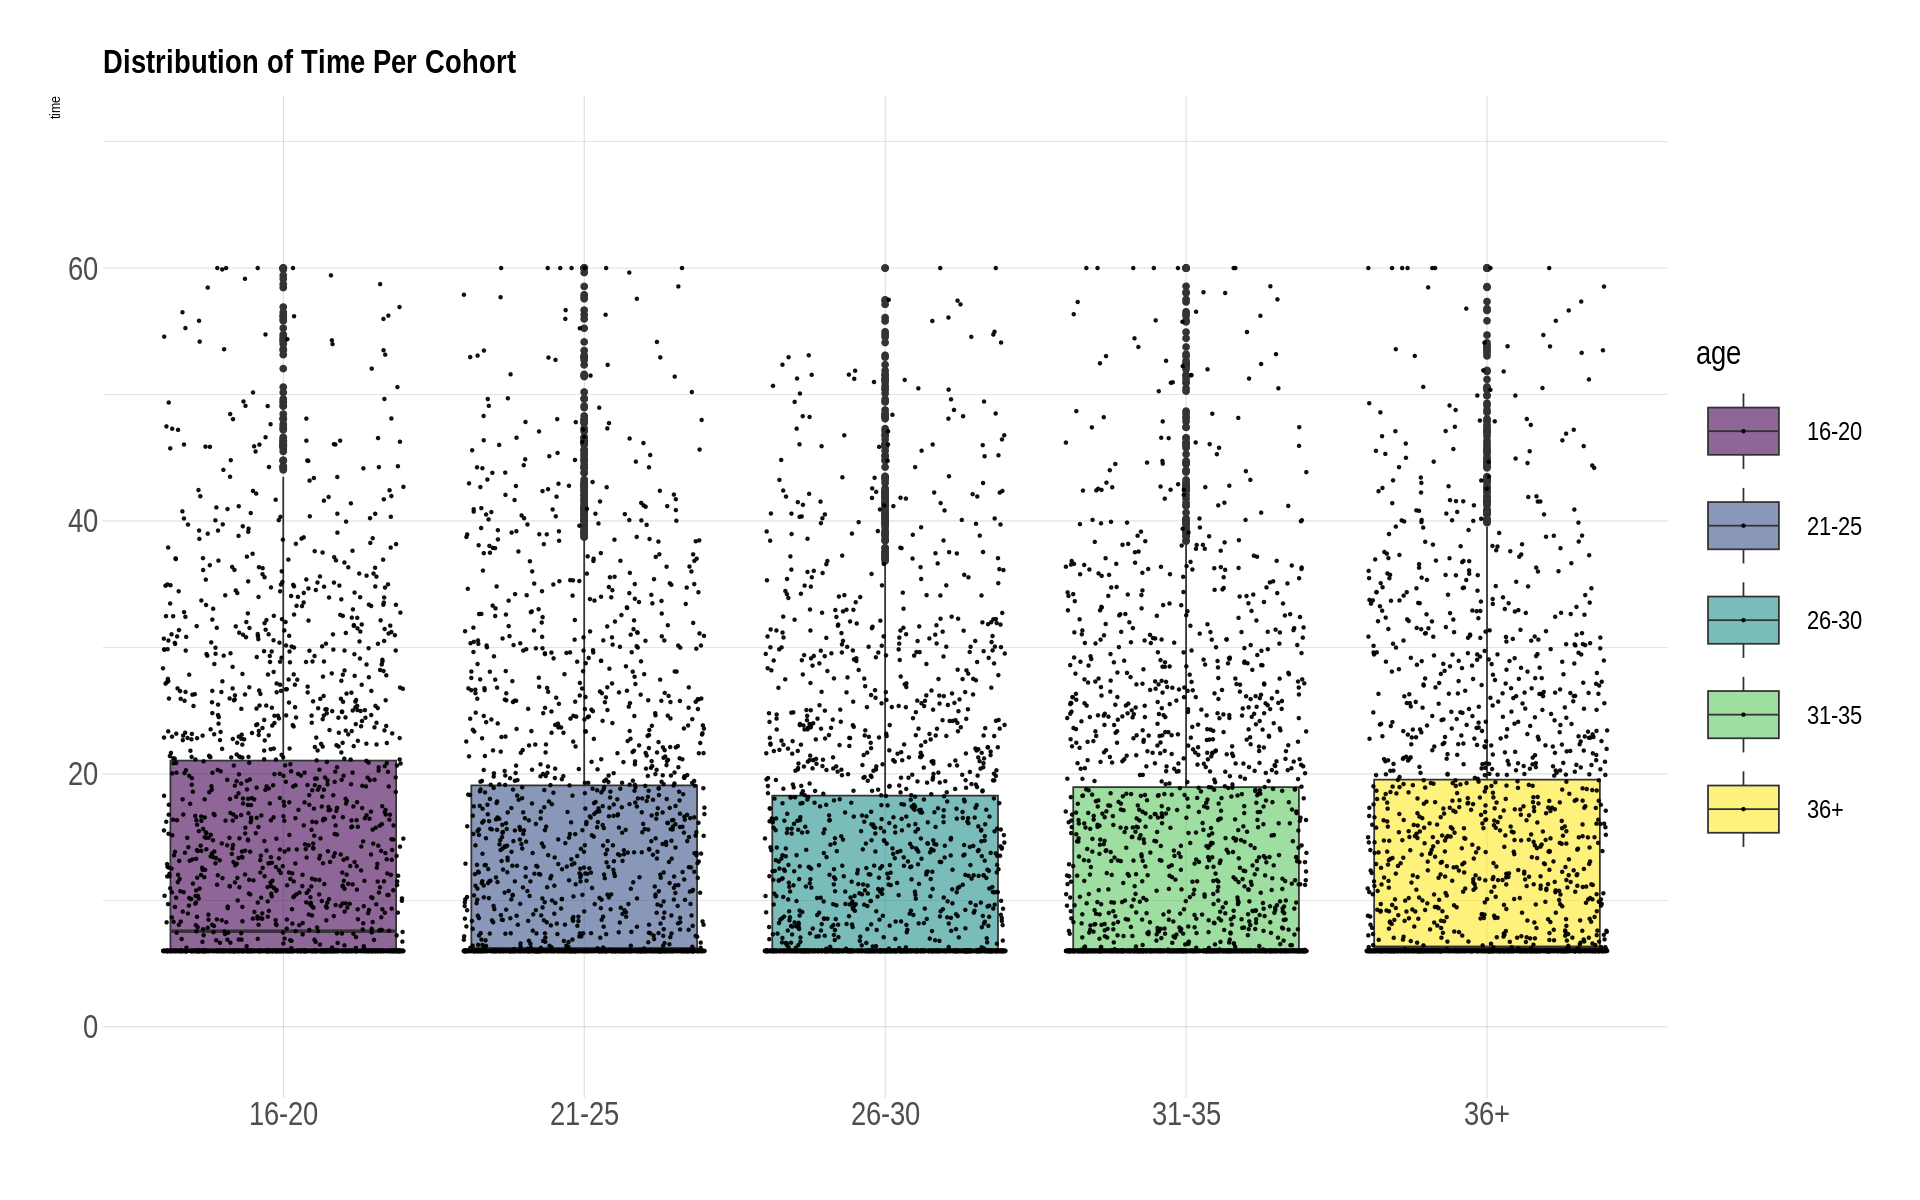

In [18]:
# Define figure options / how big or small you want the figure
options(repr.plot.width = 16, repr.plot.height =10, dpi = 300)

# Plot the chart
df %>%
  ggplot( aes(x=age, y=time, fill=age)) +
    geom_boxplot() +
    scale_fill_viridis(discrete = TRUE, alpha=0.6) +
    geom_jitter(color="black", size=0.6, alpha=0.9) +
    theme_ipsum() +
    theme(
      legend.position="right",
      legend.key.size = unit(2, 'cm'), #change legend key size
      legend.key.height = unit(2, 'cm'), #change legend key height
      legend.key.width = unit(2, 'cm'), #change legend key width
      legend.title = element_text(size=20), #change legend title font size
      legend.text = element_text(size=16), #change legend text font size
      axis.text.x=element_text(size=20), #change x axis text size
      axis.text.y=element_text(size=20), #change y axis text size
      plot.title = element_text(size=20)
    ) +
    ggtitle("Distribution of Time Per Cohort") +
    xlab("") + 
    ylim(-2,70) # change the y axis for legibility 
  
# ggsave(plot = df, width = 3, height = 3, dpi = 300, filename = "squished axis.pdf")  

In [19]:
# calculate summary statistics
df %>%
  group_by(age) %>%
  summarise(quantile(time,0.75))

age,"quantile(time, 0.75)"
<chr>,<dbl>
16-20,21.05269
21-25,19.09157
26-30,18.28110
31-35,18.95265
36+,19.54644


##### **Observations and Insights:**
Here are some of the things we can glean from our boxplot:
- Approximately **`50%`** of users across all cohorts watched the force view frames **`first 6 sec frame`**.
- Approximately **`25%`** of users across all cohorts watched between **`6 and 19 sec`**.
- There are large number of outliers present in the dataset.

#### **Distribution of Time Per Gender**

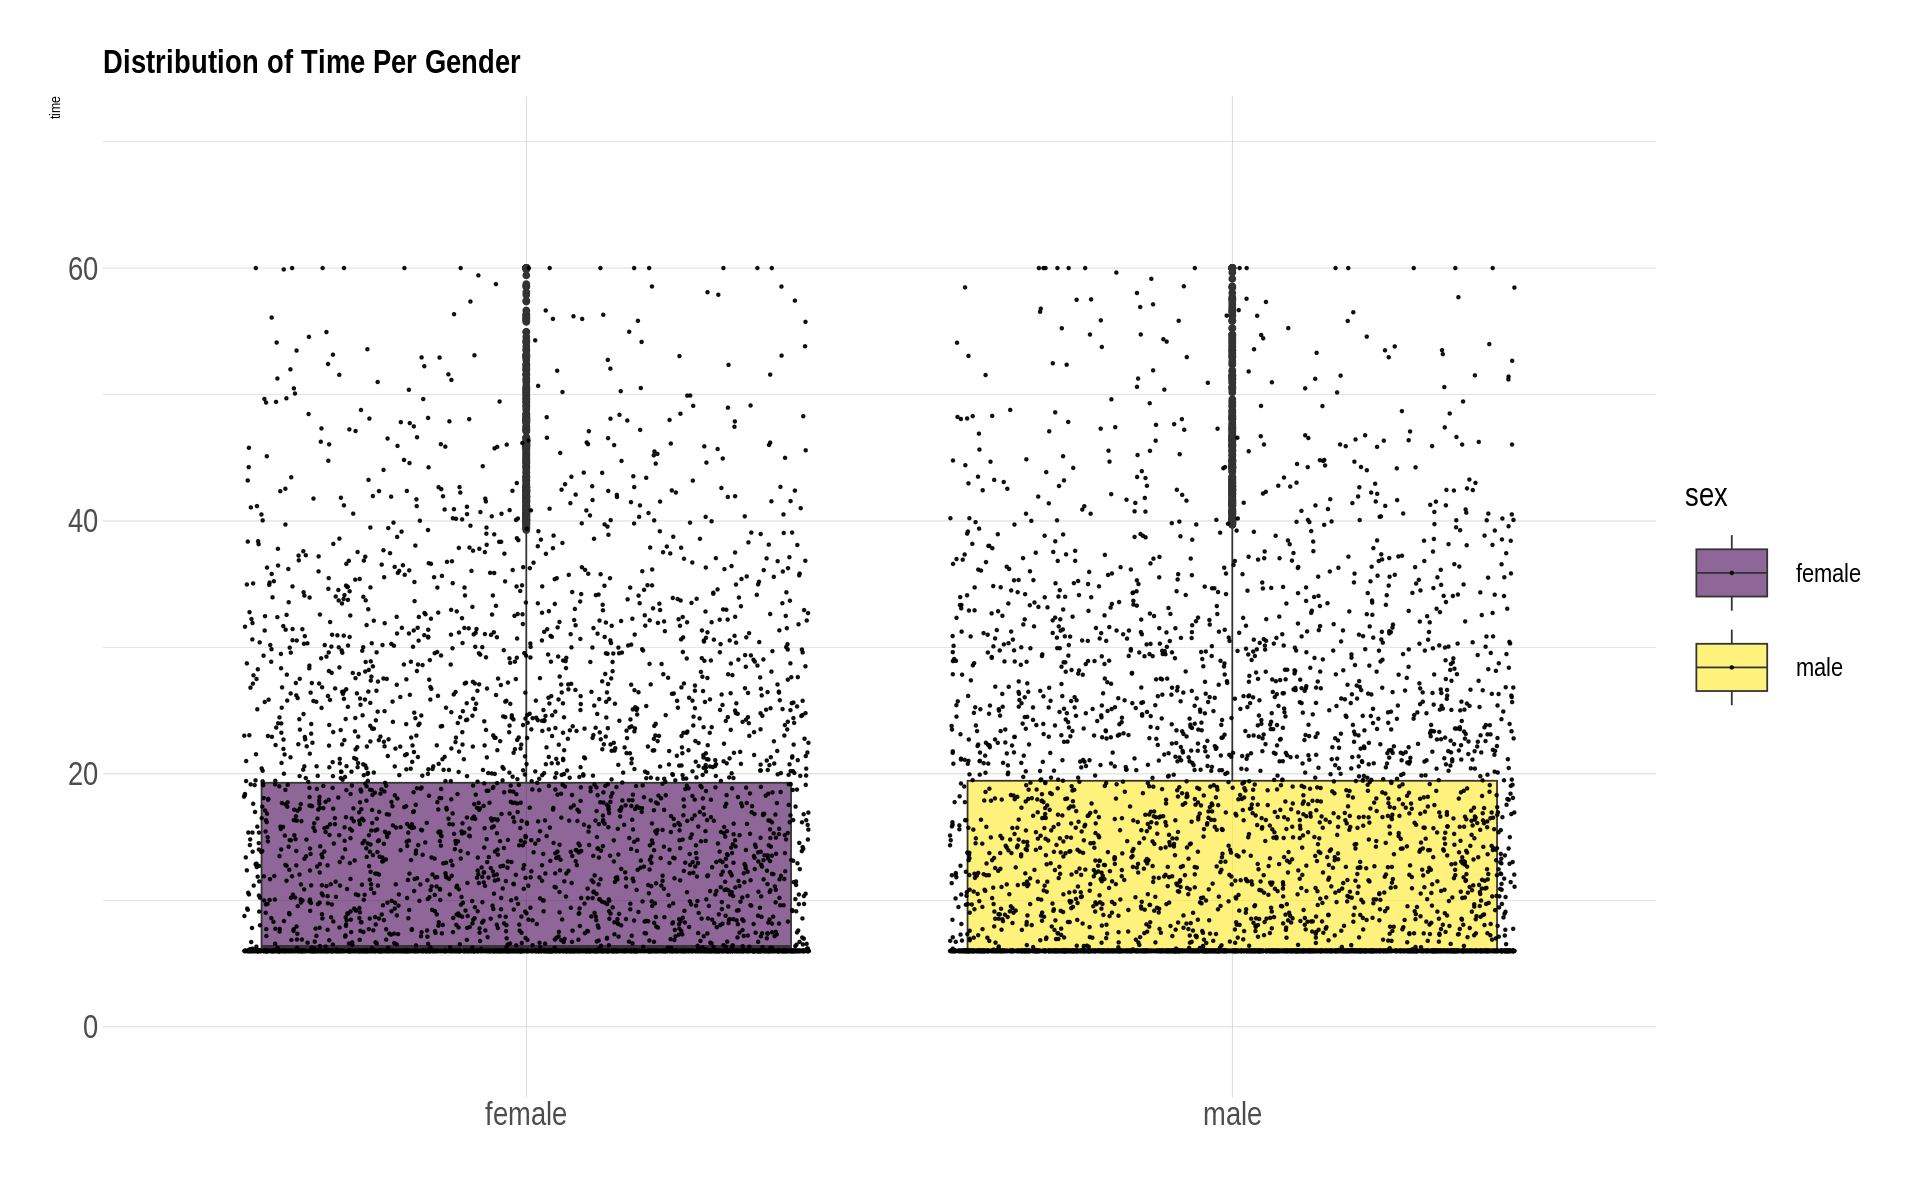

In [20]:
# Define figure options / how big or small you want the figure
options(repr.plot.width = 16, repr.plot.height =10, dpi = 300)

# Plot the chart
df %>%
  ggplot( aes(x=sex, y=time, fill=sex)) +
    geom_boxplot() +
    scale_fill_viridis(discrete = TRUE, alpha=0.6) +
    geom_jitter(color="black", size=0.6, alpha=0.9) +
    theme_ipsum() +
    theme(
      legend.position="right",
      legend.key.size = unit(2, 'cm'), #change legend key size
      legend.key.height = unit(2, 'cm'), #change legend key height
      legend.key.width = unit(2, 'cm'), #change legend key width
      legend.title = element_text(size=20), #change legend title font size
      legend.text = element_text(size=16), #change legend text font size
      axis.text.x=element_text(size=20), #change x axis text size
      axis.text.y=element_text(size=20), #change y axis text size
      plot.title = element_text(size=20)
    ) +
    ggtitle("Distribution of Time Per Gender") +
    xlab("") + 
    ylim(-2,70) # change the y axis for legibility 
  
# ggsave(plot = df, width = 3, height = 3, dpi = 300, filename = "squished axis.pdf")  

In [21]:
# calculate summary statistics
df %>%
  group_by(sex) %>%
  summarise(quantile(time,0.75))

sex,"quantile(time, 0.75)"
<chr>,<dbl>
female,19.29910
male,19.45775


##### **Observations and Insights:**
Here are some of the things we can glean from our boxplot:
- Approximately **`50%`** of users across all genders watched the force view frames **`first 6 sec frame`**.
- Approximately **`25%`** of females watched between **`6 and 20 sec`**, while their male counterparts watched between **`6 and 18 sec`**.
- There are large number of outliers present across all genders.

#### **Distribution of Time Per Age & Gender**

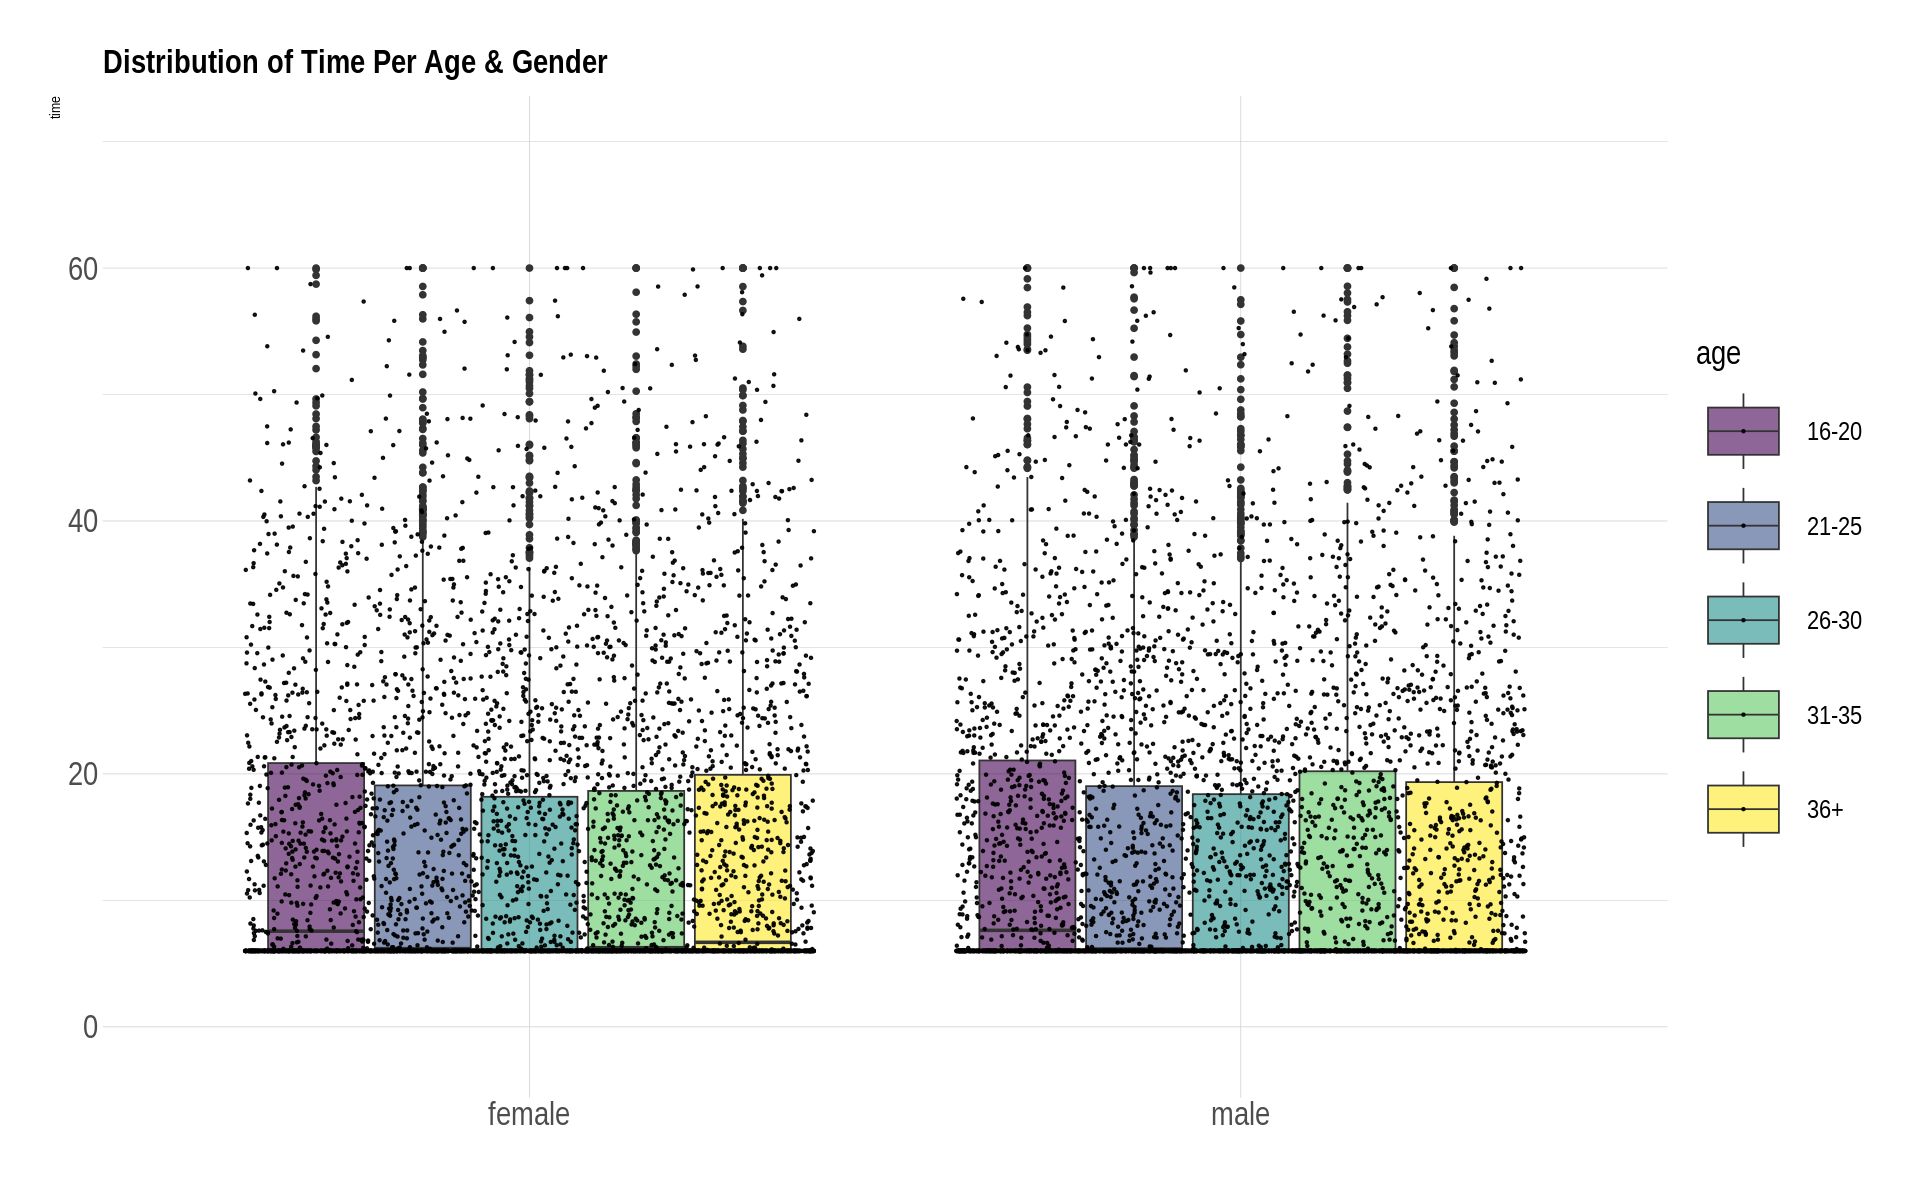

In [22]:
# Define figure options / how big or small you want the figure
options(repr.plot.width = 16, repr.plot.height =10, dpi = 300)

# Plot the chart
df %>%
  ggplot( aes(x=sex, y=time, fill=age)) +
    geom_boxplot() +
    scale_fill_viridis(discrete = TRUE, alpha=0.6) +
    geom_jitter(color="black", size=0.6, alpha=0.9) +
    theme_ipsum() +
    theme(
      legend.position="right",
      legend.key.size = unit(2, 'cm'), #change legend key size
      legend.key.height = unit(2, 'cm'), #change legend key height
      legend.key.width = unit(2, 'cm'), #change legend key width
      legend.title = element_text(size=20), #change legend title font size
      legend.text = element_text(size=16), #change legend text font size
      axis.text.x=element_text(size=20), #change x axis text size
      axis.text.y=element_text(size=20), #change y axis text size
      plot.title = element_text(size=20)
    ) +
    ggtitle("Distribution of Time Per Age & Gender") +
    xlab("") + 
    ylim(-2,70) # change the y axis for legibility 
  
# ggsave(plot = df, width = 3, height = 3, dpi = 300, filename = "squished axis.pdf")  

In [23]:
# calculate summary statistics
df %>%
  group_by(sex,age) %>%
  summarise(quantile(time,0.75))

`summarise()` has grouped output by 'sex'. You can override using the `.groups`
argument.


sex,age,"quantile(time, 0.75)"
<chr>,<chr>,<dbl>
female,16-20,20.85619
female,21-25,19.08945
female,26-30,18.19200
female,31-35,18.65594
female,36+,19.92824
male,16-20,21.06297
male,21-25,19.03059
male,26-30,18.39759
male,31-35,20.20779


##### **Observations and Insights:**
Here are some of the things we can glean from our boxplot:
- Approximately **`50%`** of users across all genders watched the force view frames **`first 6 sec frame`**.
- Approximately **`25%`** of females watched between **`6 and 20 sec`**.
- There are large number of outliers present across all genders and cohorts.

### **Kaplan Meier Survival Curve (All Users)**

Let"s start by first understanding what percentage of our starting population makes it throughout different stages of the video.


In [24]:
# TBD
KM_1 = survfit(Surv(time, observed) ~ 1, data = df)

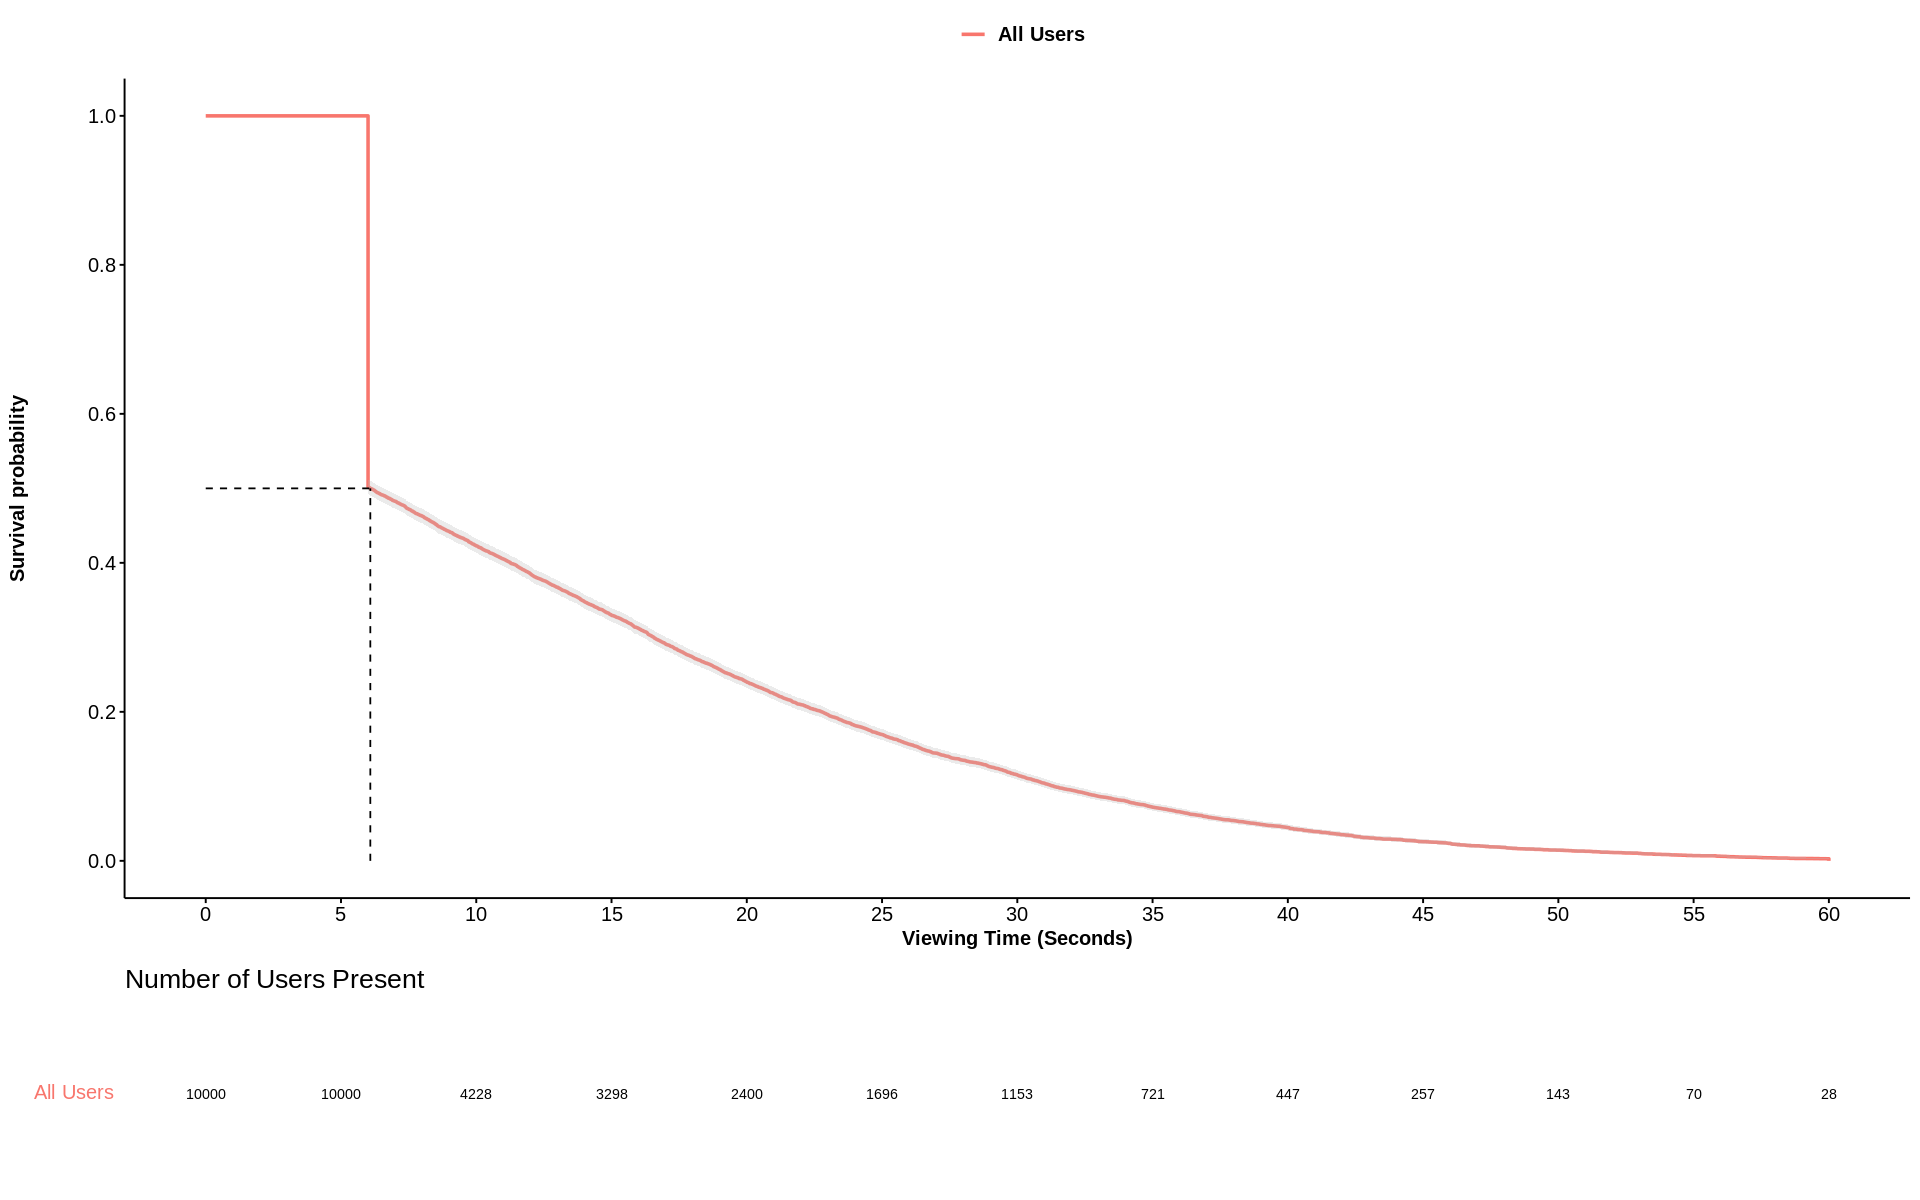

In [25]:
# TBD
ggsurvplot(
  KM_1,
  surv.median.line    = "hv",                # Add medians survival
  conf.int            = TRUE,                # CI are so thin here that we do not see them!
  risk.table          = TRUE, #"abs_pct",    #Add risk table
  risk.table.height   = 0.2,
  risk.table.title    = "Number of Users Present", 
  tables.theme        = theme_cleantable(),
  legend.labs         = c("All Users"),
  risk.table.pos      = "out",
  risk.table.fontsize = 3,
  break.x.by          = 5,
  break.y.by          = 0.2,
  xlab                = "Viewing Time (Seconds)",
  #ylab                = "Y LAB",
  legend.title        = "",
  font.x              = c(12, "bold", "black"),
  font.y              = c(12, "bold", "black"),
  font.legend         = c(12, "bold", "black"))

In [26]:
# How many users completed the video overall?
a = 10000
b = 36
print(b/a*100)

[1] 0.36


##### **Observations and Insights:**

Given that our data is fake, I think we are close enough to what we would see from the original data, so we can proceed with the data as is.
- We see the most drop-off at the 6-7 seconds frame, since the first 6 seconds would have been forced. 
- Operating with the understanding that the first 6 seconds were forced, we can now zoom in see the percentage of users still present at each frame.

In [27]:
table_km_1 = summary(KM_1, time = c(4, 5, 6, 7, 8, 9, 10))

tibble(
  time               = table_km_1$time, 
  `survival (%)`     = round(table_km_1$surv, digits = 2) * 100,
  `lower 95% CI (%)` = round(table_km_1$lower, digits = 2) * 100,
  `upper 95% CI (%)` = round(table_km_1$upper, digits = 2) * 100) %>% 
  knitr::kable(caption = "Survival Probabilities for particular time points of interest")



Table: Survival Probabilities for particular time points of interest

| time| survival (%)| lower 95% CI (%)| upper 95% CI (%)|
|----:|------------:|----------------:|----------------:|
|    4|          100|              100|              100|
|    5|          100|              100|              100|
|    6|           50|               49|               51|
|    7|           48|               47|               49|
|    8|           46|               45|               47|
|    9|           44|               43|               45|
|   10|           42|               41|               43|

In [28]:
print(KM_1)

Call: survfit(formula = Surv(time, observed) ~ 1, data = df)

         n events median 0.95LCL 0.95UCL
[1,] 10000  10000   6.08       6    6.59


##### **Observations and Insights:**

We can see that **`approximately 50% of the entire population`** in our dataset made it to that **`six (6) seconds frame`**.
- We can also see that the **`median suvival time is 6 seconds`**
- and we can say that we **`are 95% certain that the mean survival time lies between 6 seconds and 6.23 seconds`**

### **Kaplan Meier Survival Curve Per Gender**
Next, we will analyze the percentage of our male and female audiences who made it throughout different stages of the video.

In [29]:
KM_2 = survfit(Surv(time, observed) ~ sex, data = df)

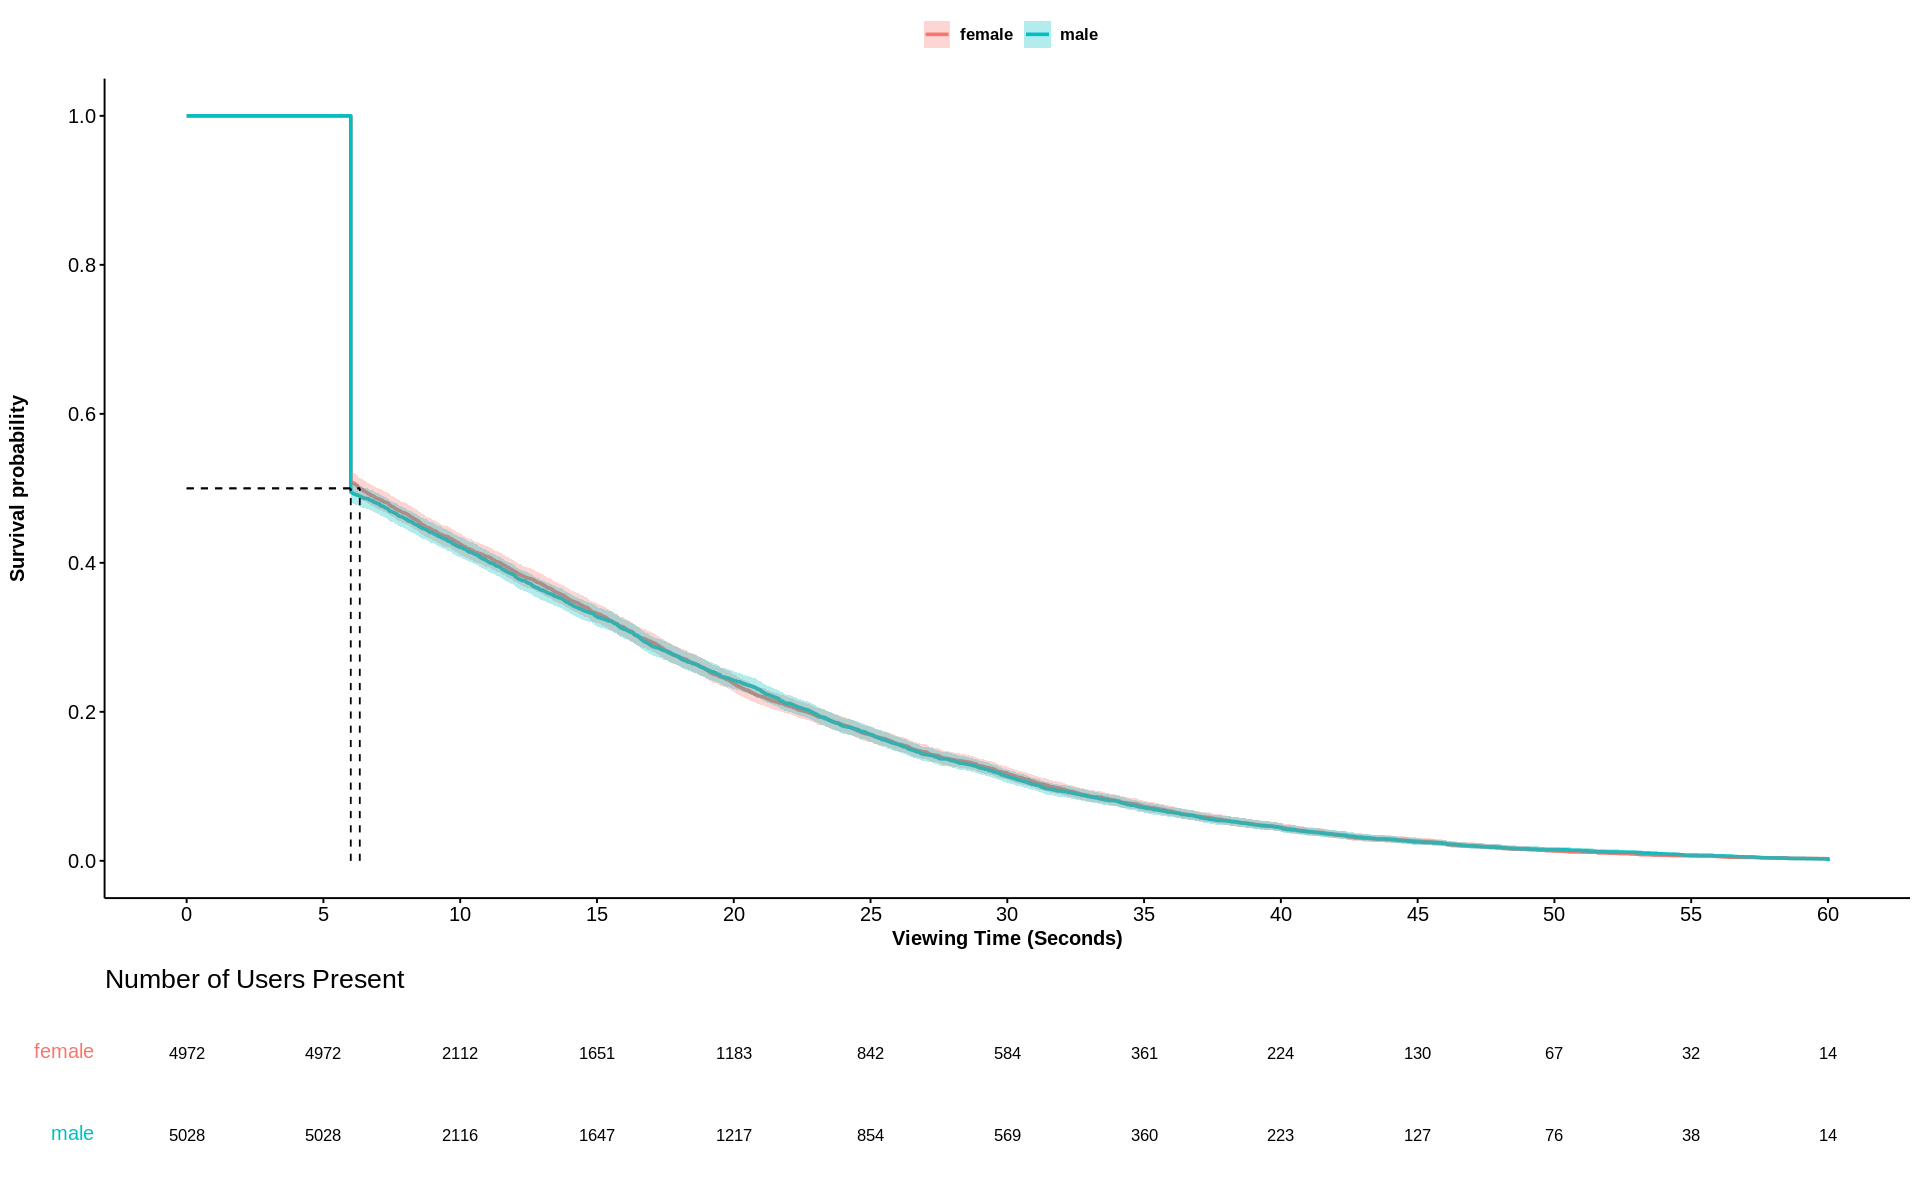

In [30]:
ggsurvplot(
  KM_2,
  surv.median.line    = "hv",                # Add medians survival
  conf.int            = TRUE,                # CI are so thin here that we do not see them!
  risk.table          = TRUE, #"abs_pct",                 #Add risk table
  risk.table.height   = 0.2,
  risk.table.title    = "Number of Users Present", 
  tables.theme        = theme_cleantable(),
  risk.table.pos      = "out",
  risk.table.fontsize = 3.5,
  break.x.by          = 5,
  break.y.by          = 0.2,
  xlab                = "Viewing Time (Seconds)",
  legend.title        = "",
  legend.labs         = c("female", "male"),
  font.x              = c(12, "bold", "black"),
  font.y              = c(12, "bold", "black"),
  font.legend         = c(10, "bold", "black"))

In [31]:
# How many males completed the video overall?
ms = 5071
mc = 21
print(mc/ms*100)

# How many females completed the video overall?
fs = 4929
fc = 15
print(fc/fs*100)

[1] 0.4141195
[1] 0.3043214


##### **Observations and Insights:**

We can see that **`we have slightly more males than females`** in our dataset, and both populations are following the same performance tracjectory. 
- Given the population composition, it would also stand to reason that more males made it through each frame than females.
- and that"s exactly what we see here

In [32]:
table_km_2 = summary(KM_2, time = c(4, 5, 6, 7, 8, 9, 10))

tibble(
  time                 = table_km_2$time[1:7], 
  `Gender`             = c(rep("female", 7)),
  `survival (%) `      = round(table_km_2$surv[1:7], digits = 2) * 100,
  ` lower 95% CI (%)`  = round(table_km_2$lower[1:7], digits = 2) * 100,
  ` upper 95% CI (%)`  = round(table_km_2$upper[1:7], digits = 2) * 100,
  `Gender `            = c(rep("male", 7)),
  `survival (%)`       = round(table_km_2$surv[8:14], digits = 2) * 100,
  `lower 95% CI (%)`   = round(table_km_2$lower[8:14], digits = 2) * 100,
  `upper 95% CI (%)`   = round(table_km_2$upper[8:14], digits = 2) * 100) %>% 
  knitr::kable(caption = "Survival Probabilities for particular time points of interest")



Table: Survival Probabilities for particular time points of interest

| time|Gender | survival (%) |  lower 95% CI (%)|  upper 95% CI (%)|Gender  | survival (%)| lower 95% CI (%)| upper 95% CI (%)|
|----:|:------|-------------:|-----------------:|-----------------:|:-------|------------:|----------------:|----------------:|
|    4|female |           100|               100|               100|male    |          100|              100|              100|
|    5|female |           100|               100|               100|male    |          100|              100|              100|
|    6|female |            51|                49|                52|male    |           50|               48|               51|
|    7|female |            49|                47|                50|male    |           48|               47|               49|
|    8|female |            47|                45|                48|male    |           46|               45|               47|
|    9|female |            44|  

In [33]:
print(KM_2)

Call: survfit(formula = Surv(time, observed) ~ sex, data = df)

              n events median 0.95LCL 0.95UCL
sex=female 4972   4972   6.33       6    7.00
sex=male   5028   5028   6.00       6    6.63


##### **Observations and Insights:**

Similarly, we observed the following from our gender breakout:
- Approximately **`48% of the female audience`** made it to that **`six (7) seconds frame`**.
- Approximately **`49% of males`** made it to that same time stamp 
- The median suvival intervals also differ slights given the nature of the dataset

Let"s run a **`Log-Rank Test`** test to see if there are significant differences between these two audiences.

In [34]:
survdiff(Surv(time, observed) ~ sex, data = df)

Call:
survdiff(formula = Surv(time, observed) ~ sex, data = df)

              N Observed Expected (O-E)^2/E (O-E)^2/V
sex=female 4972     4972     4978   0.00719    0.0191
sex=male   5028     5028     5022   0.00712    0.0191

 Chisq= 0  on 1 degrees of freedom, p= 0.9 

##### **Observations and Insights:**

Given the **`p value 0.9 is greater than 0.05`**, we can conclude that there are no significant differences between both curves. 

### **Kaplan Meier Survival Curve Per Age Group**
Now, let"s analyze the percentage of users per age group who made it throughout different stages of the video.

In [35]:
KM_3 = survfit(Surv(time, observed) ~ age, data = df, conf.type = "log")

In [36]:
# Identify unique age groups
table(df$age)


16-20 21-25 26-30 31-35   36+ 
 1967  1961  2039  2093  1940 

##### **Observations and Insights:**

We can see how many unique age groups are present in our dataset, and the users present in each cohort.

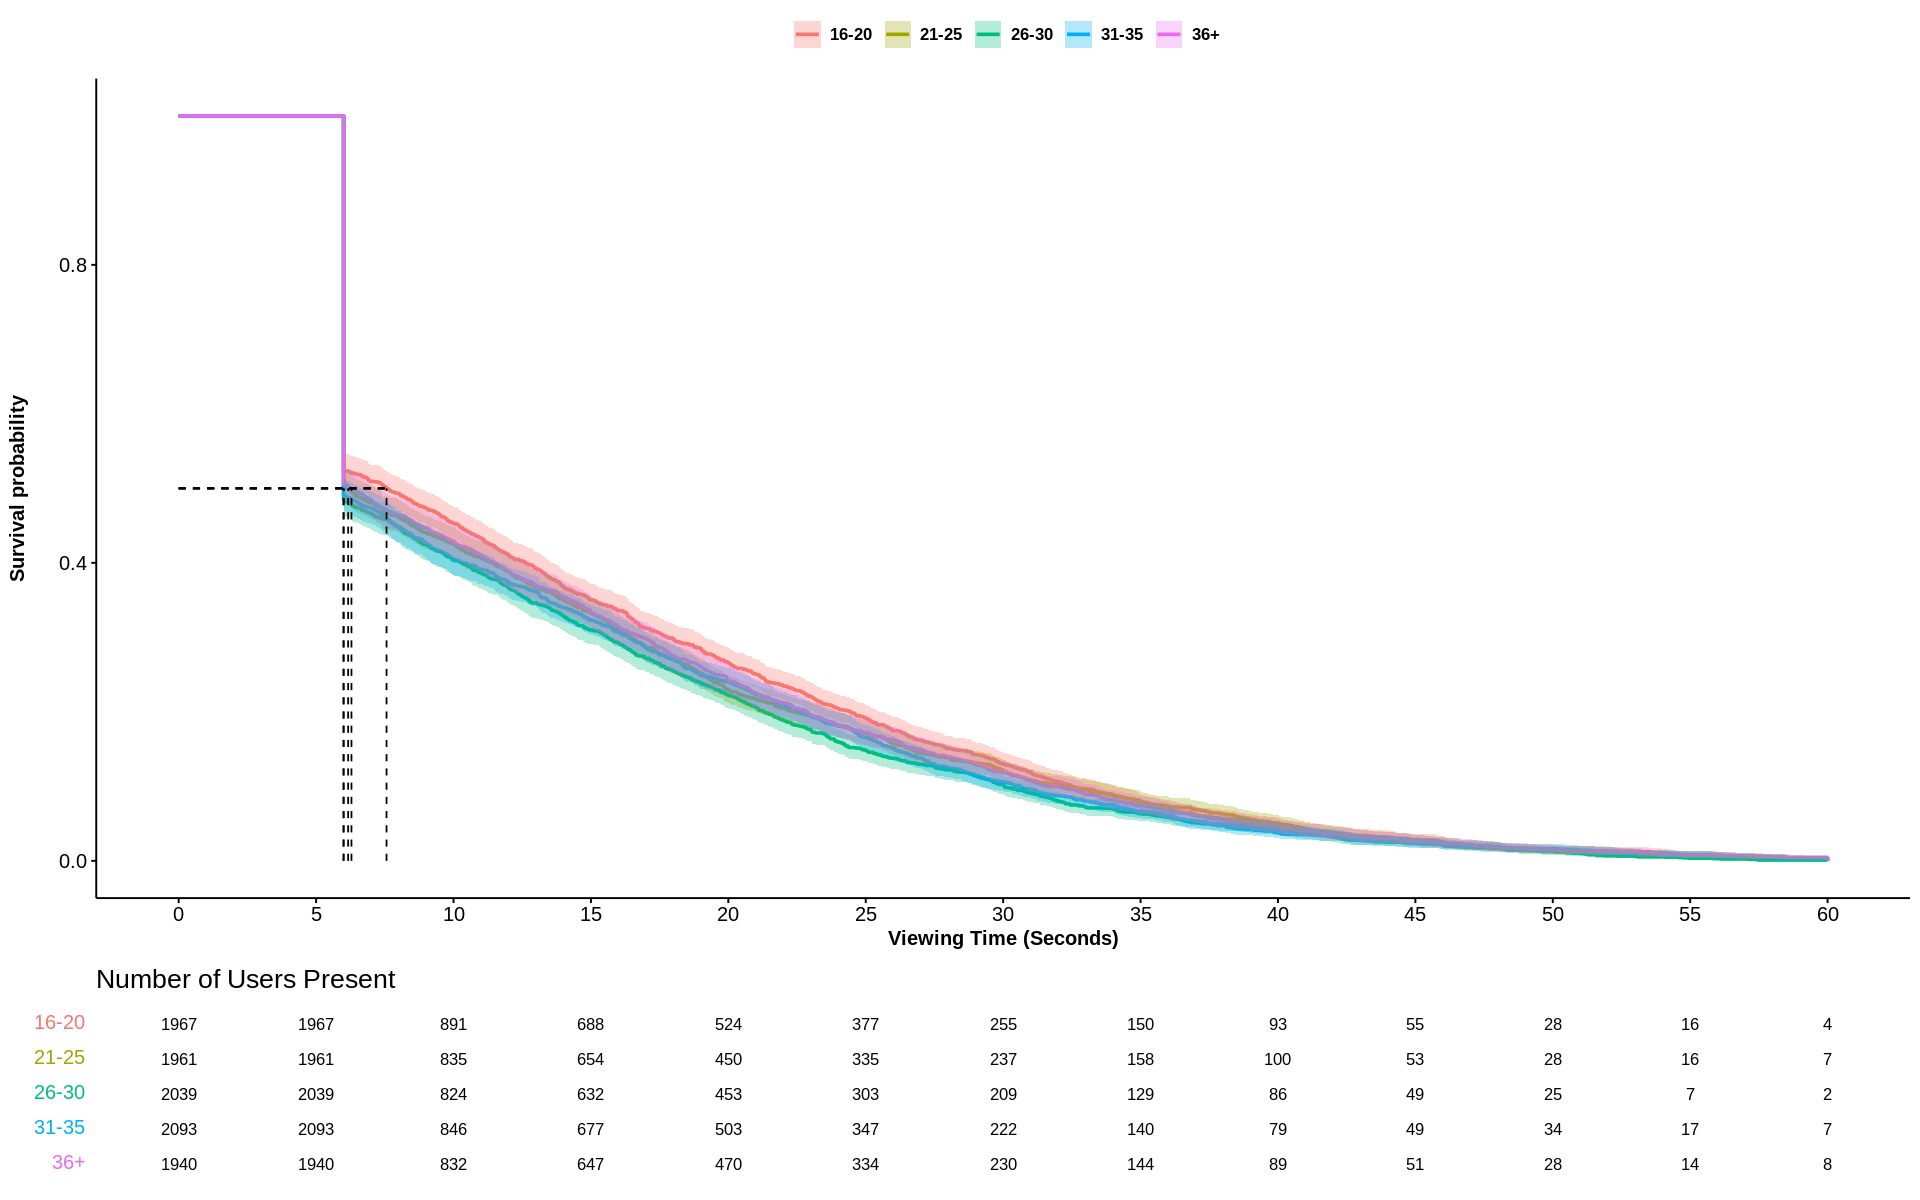

In [37]:
ggsurvplot(
  KM_3,
  surv.median.line    = "hv",                # Add medians survival
  conf.int            = TRUE,                # CI are so thin here that we do not see them!
  risk.table          = TRUE,                #Add risk table
  risk.table.height   = 0.2,
  risk.table.title    = "Number of Users Present", 
  tables.theme        = theme_cleantable(),
  risk.table.pos      = "out",
  risk.table.fontsize = 3.5,
  break.x.by          = 5,
  break.y.by          = 0.4,
  xlab                = "Viewing Time (Seconds)",
  legend.title        = "",
  legend.labs         = c("16-20", "21-25", "26-30", "31-35", "36+"),
  font.x              = c(12, "bold", "black"),
  font.y              = c(12, "bold", "black"),
  font.legend         = c(10, "bold", "black"))

In [38]:
# How many cohort1 completed the video overall?
firS = 2002
firC = 7
print(firC/firS*100)

# How many cohort2 completed the video overall?
secS = 1966
secC = 4
print(secC/secS*100)

# How many cohort3 completed the video overall?
thiS = 2037
thiC = 13
print(thiC/thiS*100)

# How many cohort4 completed the video overall?
fouS = 2022
fouC = 6
print(fouC/fouS*100)

# How many cohort5 completed the video overall?
fifS = 1973
fifC = 6
print(fifC/fifS*100)

[1] 0.3496503
[1] 0.2034588
[1] 0.6381934
[1] 0.2967359
[1] 0.3041054


##### **Observations and Insights:**

We can see that the data has more users in the **`26-30`** age bucket, followed by the **`31-35`** and the **`16-60`** cohorts. 
- We can see that the number of full video completion varies per cohort.

In [39]:
table_km_3 = summary(KM_3, time = c(4, 5, 6, 7, 8, 9, 10))

tibble(
  time               = table_km_3$time[1:7], 
  age                = c(rep("16-20", 7)),
  `survival (%)`     = round(table_km_3$surv[1:7], digits = 2) * 100,
  `lower 95% CI (%)` = round(table_km_3$lower[1:7], digits = 2) * 100,
  `upper 95% CI (%)` = round(table_km_3$upper[1:7], digits = 2) * 100) %>% 
  knitr::kable(caption = "Survival Probabilities for particular time points of interest: 16-20")

tibble(
  time               = table_km_3$time[8:14], 
  age                = c(rep ("21-25", 7)),
  `survival (%)`     = round(table_km_3$surv[8:14], digits = 2) * 100,
  `lower 95% CI (%)` = round(table_km_3$lower[8:14], digits = 2) * 100,
  `upper 95% CI (%)` = round(table_km_3$upper[8:14], digits = 2) * 100) %>% 
  knitr::kable(caption = "Survival Probabilities for particular time points of interest: 21-25")

tibble(
  time               = table_km_3$time[15:21], 
  age                = c(rep ("26-30", 7)),
  `survival (%)`     = round(table_km_3$surv[15:21], digits = 2) * 100,
  `lower 95% CI (%)` = round(table_km_3$lower[15:21], digits = 2) * 100,
  `upper 95% CI (%)` = round(table_km_3$upper[15:21], digits = 2) * 100) %>% 
  knitr::kable(caption = "Survival Probabilities for particular time points of interest: 26-30")

tibble(
  time               = table_km_3$time[22:28], 
  age                = c(rep ("31-35", 7)),
  `survival (%)`     = round(table_km_3$surv[22:28], digits = 2) * 100,
  `lower 95% CI (%)` = round(table_km_3$lower[22:28], digits = 2) * 100,
  `upper 95% CI (%)` = round(table_km_3$upper[22:28], digits = 2) * 100) %>% 
  knitr::kable(caption = "Survival Probabilities for particular time points of interest: 31-35")

tibble(
  time               = table_km_3$time[29:35], 
  age                = c(rep ("36+", 7)),
  `survival (%)`     = round(table_km_3$surv[29:35], digits = 2) * 100,
  `lower 95% CI (%)` = round(table_km_3$lower[29:35], digits = 2) * 100,
  `upper 95% CI (%)` = round(table_km_3$upper[29:35], digits = 2) * 100) %>% 
  knitr::kable(caption = "Survival Probabilities for particular time points of interest: 36+")



Table: Survival Probabilities for particular time points of interest: 16-20

| time|age   | survival (%)| lower 95% CI (%)| upper 95% CI (%)|
|----:|:-----|------------:|----------------:|----------------:|
|    4|16-20 |          100|              100|              100|
|    5|16-20 |          100|              100|              100|
|    6|16-20 |           52|               50|               55|
|    7|16-20 |           51|               49|               53|
|    8|16-20 |           49|               47|               52|
|    9|16-20 |           47|               45|               50|
|   10|16-20 |           45|               43|               48|



Table: Survival Probabilities for particular time points of interest: 21-25

| time|age   | survival (%)| lower 95% CI (%)| upper 95% CI (%)|
|----:|:-----|------------:|----------------:|----------------:|
|    4|21-25 |          100|              100|              100|
|    5|21-25 |          100|              100|              100|
|    6|21-25 |           50|               48|               53|
|    7|21-25 |           48|               46|               50|
|    8|21-25 |           46|               44|               48|
|    9|21-25 |           44|               42|               46|
|   10|21-25 |           43|               40|               45|



Table: Survival Probabilities for particular time points of interest: 26-30

| time|age   | survival (%)| lower 95% CI (%)| upper 95% CI (%)|
|----:|:-----|------------:|----------------:|----------------:|
|    4|26-30 |          100|              100|              100|
|    5|26-30 |          100|              100|              100|
|    6|26-30 |           49|               46|               51|
|    7|26-30 |           47|               44|               49|
|    8|26-30 |           45|               43|               47|
|    9|26-30 |           42|               40|               45|
|   10|26-30 |           40|               38|               43|



Table: Survival Probabilities for particular time points of interest: 31-35

| time|age   | survival (%)| lower 95% CI (%)| upper 95% CI (%)|
|----:|:-----|------------:|----------------:|----------------:|
|    4|31-35 |          100|              100|              100|
|    5|31-35 |          100|              100|              100|
|    6|31-35 |           49|               47|               51|
|    7|31-35 |           47|               45|               50|
|    8|31-35 |           45|               43|               47|
|    9|31-35 |           43|               41|               45|
|   10|31-35 |           40|               38|               43|



Table: Survival Probabilities for particular time points of interest: 36+

| time|age | survival (%)| lower 95% CI (%)| upper 95% CI (%)|
|----:|:---|------------:|----------------:|----------------:|
|    4|36+ |          100|              100|              100|
|    5|36+ |          100|              100|              100|
|    6|36+ |           51|               48|               53|
|    7|36+ |           48|               46|               51|
|    8|36+ |           46|               44|               49|
|    9|36+ |           45|               43|               47|
|   10|36+ |           43|               41|               45|

In [40]:
print(KM_3)

Call: survfit(formula = Surv(time, observed) ~ age, data = df, conf.type = "log")

             n events median 0.95LCL 0.95UCL
age=16-20 1967   1967   7.56    6.24    8.71
age=21-25 1961   1961   6.17    6.00    7.16
age=26-30 2039   2039   6.00    6.00    6.30
age=31-35 2093   2093   6.00    6.00    6.67
age=36+   1940   1940   6.29    6.00    7.25


##### **Observations and Insights:**

Similarly, we observed the following from our age breakout:
- Approximately **`47-48%`** of each chort made it to that **`six (7) seconds frame`**.
- The median suvival intervals also differ slights given the nature of the dataset

Let"s run a **`Log-Rank Test`** test to see if there are significant differences between these cohorts.

In [41]:
survdiff(Surv(time, observed) ~ age, data = df)

Call:
survdiff(formula = Surv(time, observed) ~ age, data = df)

             N Observed Expected (O-E)^2/E (O-E)^2/V
age=16-20 1967     1967     2052     3.519     5.849
age=21-25 1961     1961     1981     0.204     0.338
age=26-30 2039     2039     1948     4.227     7.088
age=31-35 2093     2093     2059     0.575     0.972
age=36+   1940     1940     1960     0.206     0.342

 Chisq= 11.7  on 4 degrees of freedom, p= 0.02 

##### **Observations and Insights:**

Given the **`p value 0.7 is greater than 0.05`**, we can conclude that there are no significant differences between each cohort curve. 

### **Conclusion**

Based on our fabricated data and analysis, we learned the following:

- Approximately **100% of the starting population watched the first 6 seconds of the video**, furthermore:

  - Approximately **`50%`** were present at the second seconds frame
  - while **`34%`** of that population watched the entire video.

- Our sample population comprised **`more males than females`**, meaning more males started the video and completed the video relative to their female counterparts. 
  - Approximately **(100%) of both genders made it through the 6 seconds frame`**
  - but more males **`(40%)`** watched the entire video relative to females **`(28%)`** 

- Now, here are a few things to consider:
  - Our dataset tries to mimic an ideal dataset but falls short
  - it"s highly unlikely to get a 100% completion during that forced view window because users drop off for a myriad of reasons in advertising, and they can turn off the programming.
  - for these reasons, I would consider using actuall data to get more accurate estimates.

### **Recommendations for the Business**

Here"s what some of this means for our client:

- Overall, less than 1% or **`0.36`** of users who started the video made it to the **`60 seconds`** frame.
  - Though this is not much, this shows that **`users who watched that long must have been more engaged than their counterparts`**.
    - Our recommendations would be to **`find and target more of those users to improve engage and action`**.

<br>

- Though population size was smaller, **`more females (0.41%) watched the entire video relative to their male counterparts (0.30%)`**.
  - This suggests that our **`female audience was more receptive to this messaging than males`**.
    - This does not mean we stop targeting males, but perhaps we **`shift more resources to the female bucket`**, knowing that they are more likely to engage.

<br>

More users in the **`26-30`** cohort completed the video (0.63%). We know that this cohort started with the most people, however, the differences in population size was not so drastic that it skew results here.
- What we can infer from this is that this cohort was simple more engaged; and may require more investment in subsequent initiatives.
  - Here are the completion rates her cohort:
    - age=16-20: **`0.35%`**
    - age=21-25: **`0.20%`**
    - age=26-30: **`0.64%`**
    - age=31-35: **`0.30%`**
    - age=36+: **`0.30%`**

### **Sources and Resources**

Package Installtion
- [How to Install Packages in R Google Colab](https://towardsdatascience.com/how-to-install-packages-in-r-google-colab-423e8928cd2e#:~:text=non%2Dzero%20exit%20status%20means,causes%20it%20in%20search%20engines.)
- [Google Colab Kernel paradigma: installation of R packages had non-zero exit status](https://stackoverflow.com/questions/66428103/google-colab-kernel-paradigma-installation-of-r-packages-had-non-zero-exit-stat)

Plotting Resources
- [Boxplotting in R](https://r-graph-gallery.com/boxplot.html)
- [Change size of axes title and labels in ggplot2](https://stackoverflow.com/questions/14942681/change-size-of-axes-title-and-labels-in-ggplot2)
- [ggplot2 axis scales and transformations](http://www.sthda.com/english/wiki/ggplot2-axis-scales-and-transformations)
- [How to resize a graph in ggplot2 in R?](https://www.geeksforgeeks.org/how-to-resize-a-graph-in-ggplot2-in-r/)